In [1]:
cd /home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection

/home/jovyan/Documents/dsi_plus/Projects/project_3 - Madelon_feature_selection


In [2]:
%run lib/__init__.py
%matplotlib inline

# Project 3: Madelon Dataset - Feature Selection + Classification

## Step 0 - EDA UCI Madelon Dataset

### Dataset overview
MADELON is an artificial dataset containing data points grouped in 32 clusters placed on the vertices of a five dimensional hypercube and randomly labeled +1 or -1. The five dimensions constitute 5 informative features. 15 linear combinations of those features were added to form a set of 20 (redundant) informative features. Based on those 20 features one must separate the examples into the 2 classes (corresponding to the +-1 labels). We added a number of distractor feature called 'probes' having no predictive power. The order of the features and patterns were randomized. 

|MADELON         |Positive ex. | Negative ex. | Total | Check_sum	
|---------------:|------------:|-------------:|------:|-------------:
|Training set    | 1000        | 1000         | 2000  | 488083511.00	
|Validation set  |  300        |  300         |  600  | 146395833.00      
|Test set        |  900        |  900         | 1800  | 439209553.00     
|All             | 2200        | 2200         | 4400  |     

Number of variables/features/attributes: 
Real: 20  -  5 of which are informative, 15 of which are linear combinations & are therefore redundant
Probes: 480 
Total: 500 


The 15 Redundant features add no addtional information over 5 informtational features, because they are correlated or because they can be obtained by [linear] combination of other features. 


### Load Data
* A class called Madelon_data has been created in lib/datasets.py. The class contains the data sources and load instructions. Files are loaded by importing the Madelon_data class from the local dataset library and instantiating a Madelon_dataset object.
* The initalisation instructions include dropping the empty feature 500 column from the train and valid data.

In [3]:
madelon=Madelon_data()

* UCI only provides target labels for the Training and Validation data sets. The Validation dataset will be used for the test dataset.

In [4]:
X_train , y_train=madelon.load_train()
X_test , y_test=madelon.load_valid()
uci_params=madelon.load_parameters()

datasets={ 'Train': [X_train , y_train] ,'Test':[X_test , y_test ]}

* Check files load correctly using parameter information provided by UCI 

In [5]:
#Check data has expected shape per UCI documenation and parameter file
for i,j in datasets.items():
    print('for {} : X {} ,  y {} , X check_sum= {}  '\
          .format(i ,j[0].shape, j[1].shape , j[0].sum().sum()))

for Train : X (2000, 500) ,  y (2000, 1) , X check_sum= 488083511  
for Test : X (600, 500) ,  y (600, 1) , X check_sum= 146395833  


In [6]:
uci_params

,Pos_ex,Neg_ex,Tot_ex,Check_sum
Dataset,,,,
Train,1000,1000,2000,4.880835e+08
Valid,300,300,600,1.463958e+08
Test,900,900,1800,4.392096e+08
All,2200,2200,4400,1.073689e+09


In [7]:
# check data correctly loaded using an assert statment on check sum for each file
assert datasets['Train'][0].sum().sum()== uci_params.loc['Train','Check_sum']
assert datasets['Test'][0].sum().sum()== uci_params.loc['Valid','Check_sum']
assert datasets['Train'][1].sum().sum()== 0
assert datasets['Test'][1].sum().sum()== 0

### Inital data exploration

In [8]:
X=pd.concat([X_train, X_test],axis=0, ignore_index=True)
y=pd.concat([y_train, y_test],axis=0, ignore_index=True)

X.shape , y.shape

((2600, 500), (2600, 1))

In [9]:
X_train.info() , X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 7.6 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Columns: 500 entries, 0 to 499
dtypes: int64(500)
memory usage: 9.9 MB


(None, None)

In [10]:
y_train.info() , y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 1 columns):
target    2000 non-null int64
dtypes: int64(1)
memory usage: 15.7 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 1 columns):
target    2600 non-null int64
dtypes: int64(1)
memory usage: 20.4 KB


(None, None)

In [11]:
X.head(3)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498


Check for nulls -  (NB empty feature 500 column dropped during initial load

In [12]:
X.isnull().sum().sum() 

0

In [13]:
y.head(3)

,target
0,-1
1,-1
2,-1


### Explore univariate distributions

In [14]:
y.target.value_counts()

 1    1300
-1    1300
Name: target, dtype: int64

Look at data statistics , add skew metric

In [15]:
stats=X.describe().T
stats['skew']=X.skew(axis=0)

In [16]:
stats.sort_values('min').head()

,count,mean,std,min,25%,50%,75%,max,skew
105,2600.0,502.054231,133.641322,0.0,409.00,499.0,599.00,999.0,-0.034807
453,2600.0,482.584231,113.347687,84.0,399.00,489.0,562.00,807.0,-0.106966
493,2600.0,497.734615,127.455585,103.0,405.75,505.5,586.25,920.0,-0.075489
336,2600.0,480.148462,103.831142,180.0,407.75,482.0,553.00,828.0,-0.005750
153,2600.0,501.354231,97.810302,182.0,417.00,501.0,585.00,814.0,0.014105


Look at distribution of feature values

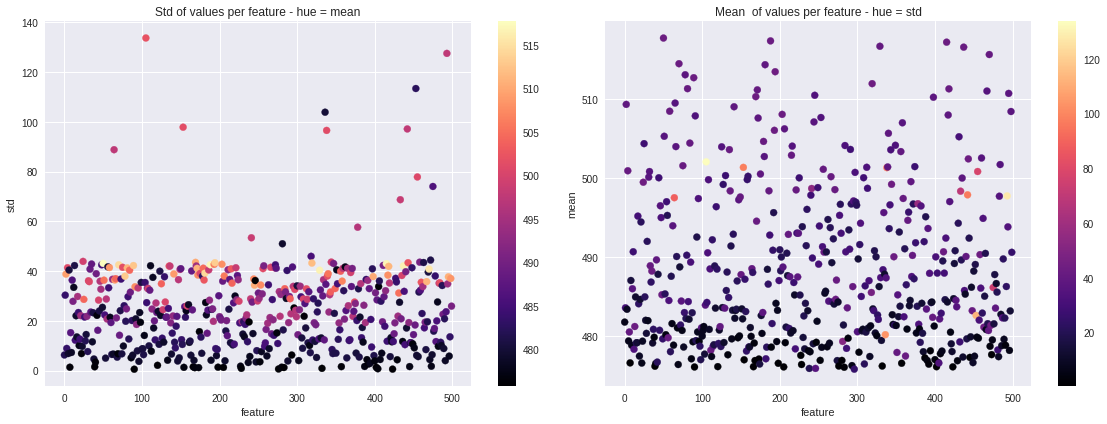

In [94]:
fig=plt.figure(figsize=(16,6))
fig.add_subplot(1,2,1)
plt.scatter(range(500),X.std() , c=X.mean(), cmap='magma')
plt.title('Std of values per feature - hue = mean')
plt.xlabel('feature')
plt.ylabel('std')
plt.colorbar()
fig.add_subplot(1,2,2)
plt.scatter(range(500),X.mean() , c=X.std(), cmap='magma')
plt.title('Mean  of values per feature - hue = std')
plt.xlabel('feature')
plt.ylabel('mean')
plt.colorbar()
fig.tight_layout()
plt.savefig('./images/00-eda-uci-feature_distributions.jpg')

In [95]:
f_s=stats[stats['std'] > 50].index
pd.DataFrame(f_s).to_pickle('./data/pickle_data/UCI_fs')     
f_s

Int64Index([64, 105, 153, 241, 281, 336, 338, 378, 433, 442, 453, 455, 475,
            493],
           dtype='int64')

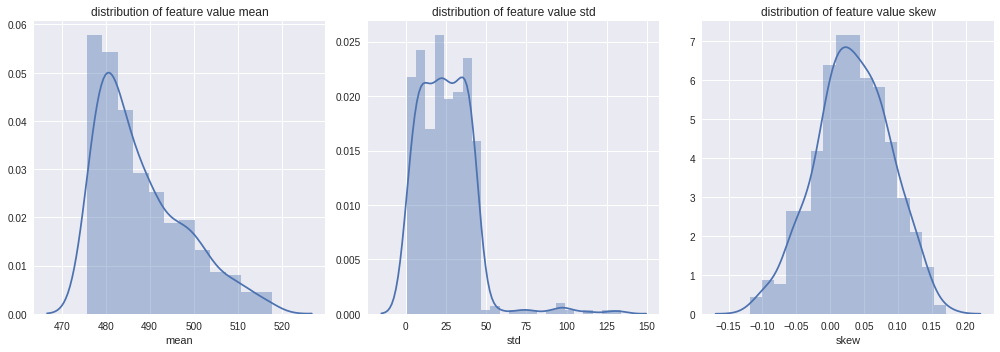

In [96]:
fig=plt.figure(figsize=(14,5))
fig.add_subplot(1,3,1)
sns.distplot(X.mean())
plt.xlabel('mean')
plt.title('distribution of feature value mean')

fig.add_subplot(1,3,2)
sns.distplot(X.std())
plt.xlabel('std')
plt.title('distribution of feature value std')

fig.add_subplot(1,3,3)
sns.distplot(X.skew())
plt.xlabel('skew')
plt.title('distribution of feature value skew')

fig.tight_layout()
plt.savefig('./images/00-eda-uci-feature_kde.jpg')

### Obersvations :
* 500 features all have mean values in a range 460 to 520 - distribution of means is skewed to the right
* Most of the features have slimilar variance  (std = 0-50 )  - small number of features have much higher dispersion of values - this can also nbe seen in the scatter plts
* The level of skew is realtively low for most features but there are some outliers
* target labels that are evenly distributed between classes  1 and -1

Preprocessing should include both scaling and de-skewing of datasets.

### Explore multivariate distributions - between features

Explore correlation between features with a correlation matrix

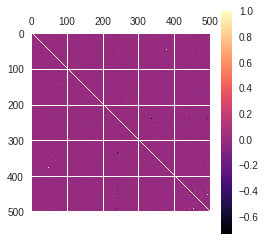

In [97]:
mean_corr=X.corr()
plt.matshow(mean_corr, cmap='magma')
plt.colorbar()


In [98]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

def get_all_abs_correlations(df):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr

print("Top Absolute Correlations")
all_corr=pd.DataFrame(get_all_abs_correlations(X), columns=['corr'])
top_corr=pd.DataFrame(get_top_abs_correlations(X, 20), columns=['corr'])

Top Absolute Correlations


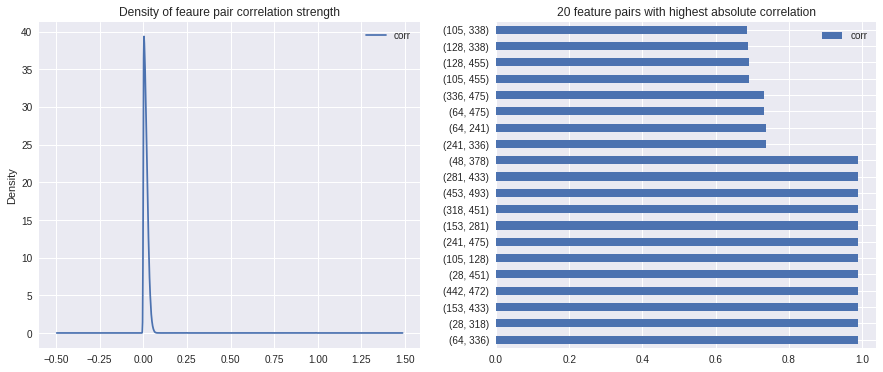

In [115]:
fig =plt.figure(figsize=(15,6))
ax1=fig.add_subplot(1,2,1)
all_corr.plot.kde( ax=ax1)
ax1.set_title('Density of feaure pair correlation strength')
ax2=fig.add_subplot(1,2,2)
top_corr.plot.barh(ax=ax2)
ax2.set_title('20 feature pairs with highest absolute correlation')
plt.show()
fig.savefig('./images/00-eda-uci-feature_correlation.jpg')

With the large no. of features it is difficult to assess or visualize reltionships between features. We can use Prinicpal Component Analysis to explore relationships between the features. PCA idientifes weighted subsets of features that explain the variance within the feature values. For example... 

In [100]:
pca=PCA()
Xp=pca.fit_transform(X)

In [101]:
Xp_df=pd.DataFrame(Xp, columns=['PC'+str(1+i) for i in range(500)])
Xp_df.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC491,PC492,PC493,PC494,PC495,PC496,PC497,PC498,PC499,PC500
0,274.402953,352.959766,-103.067956,-134.822104,16.238616,27.888326,33.284647,12.703037,58.463977,-43.49076,...,-0.130623,-1.310504,0.982704,1.386832,1.158560,-0.614343,0.411537,-0.270442,-0.117890,0.194064
1,248.379090,-154.984076,-14.008029,13.878772,59.898397,60.678871,7.298233,-22.380565,27.227759,28.06851,...,-1.099972,-0.956456,1.404060,0.453734,-1.189111,0.618888,-0.182170,-1.173830,0.304145,0.446305
2,-257.304393,77.480380,-8.697188,-36.079164,-72.161065,-12.339513,-64.642768,-13.015359,54.162353,-4.92235,...,-0.463146,0.554168,-1.150119,1.449222,-1.366178,0.864179,0.349540,-0.187479,0.110298,0.228965


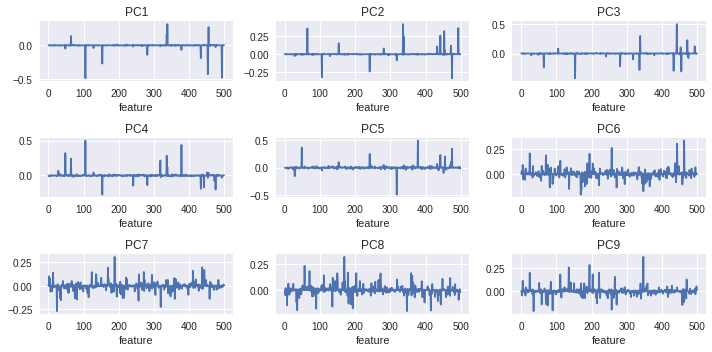

In [103]:
fig=plt.figure(figsize=(10,5))
for i in range(9):
    fig.add_subplot(3,3,1+i)
    plt.plot(pca.components_[i])
    plt.xlabel('feature')
    plt.title('PC'+str(i+1))
    
plt.tight_layout()
plt.savefig('./images/00-eda-uci-PC.jpg')

In [80]:
Xp_var=pd.DataFrame(pca.explained_variance_ratio_, columns=['var_ratio'])

In [81]:
Xp_var['cum_var']=Xp_var.var_ratio.cumsum()

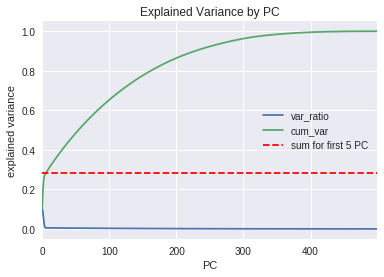

In [116]:
Xp_var.sort_values('var_ratio',ascending=False).plot()
plt.axhline(Xp_var.loc[5,'cum_var'],c='r',ls='--', label='sum for first 5 PC')
plt.ylabel('explained variance')
plt.xlabel('PC')
plt.legend()
plt.title('Explained Variance by PC')
plt.savefig('./images/00-eda-uci-PC-var.jpg')

Observing the top 5 principal components there is clearly correlated features present but there is also alot of noise present and top 5 principal components only explain a small amount of the total variance in the feature dataset. 

The feature selection process should remove the noisy features.

### Explore multivariate distributions - between features and target

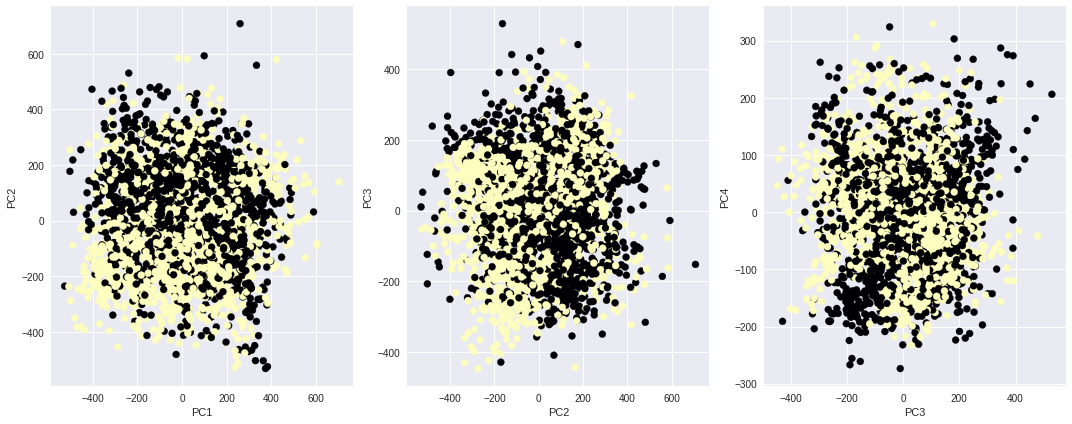

In [105]:
fig=plt.figure(figsize=(15,6))
fig.add_subplot(1,3,1)
plt.scatter(Xp_df.PC1,Xp_df.PC2, c=y, cmap='magma')
plt.xlabel('PC1')
plt.ylabel('PC2')
fig.add_subplot(1,3,2)
plt.scatter(Xp_df.PC2,Xp_df.PC3, c=y, cmap='magma')
plt.xlabel('PC2')
plt.ylabel('PC3')
fig.add_subplot(1,3,3)
plt.scatter(Xp_df.PC3,Xp_df.PC4, c=y, cmap='magma')
plt.xlabel('PC3')
plt.ylabel('PC4')
fig.tight_layout()
plt.savefig('./images/00-eda-uci-PC-corr.jpg')

Some clustering => PC1 PC2 correlated to target. Difficult to see relationship with the high level of noisy features. Revist after feature selection.

### Feature engineering - variable transformation
Use Box-Cox transformation to remove skew from features - add constant =1 to ensure all values >0 optimize Lambda
```
y = (x**lmbda - 1) / lmbda,  for lmbda > 0
    log(x),                  for lmbda = 0
```

In [106]:
from scipy.stats import boxcox

In [107]:
Xbc=pd.DataFrame()
Xbc_l=pd.DataFrame()
for col in range(len(X.columns)):
    BC_t, lmbda=boxcox((X[col]+1))
    BC_tl=boxcox((X[col]+1) ,lmbda=lmbda)
    Xbc[col]=pd.Series(BC_t)
    Xbc_l[col]=pd.Series(BC_tl)

In [108]:
lmbda

0.50748145244778309

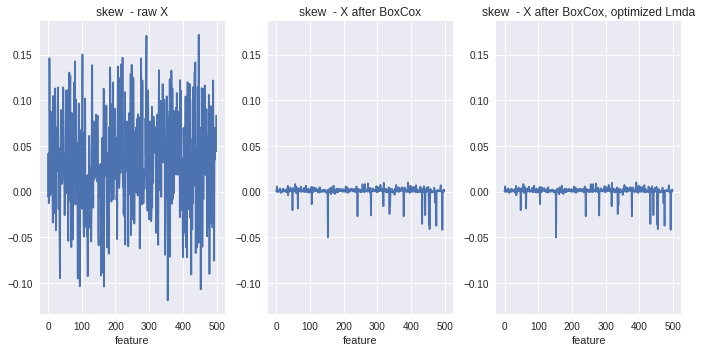

In [109]:
fig=plt.figure(figsize=(10,5))
#fig.add_subplot(1,3,1)
ax1=plt.subplot(131)
plt.plot(X.skew())
plt.xlabel('feature')
plt.title('skew  - raw X')
ax2=plt.subplot(132, sharey=ax1)
plt.plot(Xbc.skew())
plt.xlabel('feature')
plt.title('skew  - X after BoxCox')
ax2=plt.subplot(133, sharey=ax1)
plt.plot(Xbc_l.skew())
plt.xlabel('feature')
plt.title('skew  - X after BoxCox, optimized Lmda')
plt.tight_layout()
plt.savefig('./images/00-eda-uci-feature_skew.jpg')

### Data past to feature selection process
Pickle the de-skewed X data and the y data for use in feature selection process ( note this has been shifted by a constant of 1 to enable box cox transformation).

In [110]:
Xbc_l.to_pickle('./data/pickle_data/UCI_X')
y.to_pickle('./data/pickle_data/UCI_y')    

Check pickle data saved correctly

In [111]:
X_check=pd.read_pickle('./data/pickle_data/UCI_X')
y_check=pd.read_pickle('./data/pickle_data/UCI_y')

In [112]:
Xbc_l.equals(X_check)

True

In [113]:
y.equals(y_check)

True